In [299]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle

In [300]:
Rayons=np.array([3,4,5])/2

Masses=[0  , 100 , 200 , 400 , 800 , 1600, 3200, 6400]

R =  [ [7.5, 7.5 , 10.0, 10.0, 12.5, 15.0, 0   , 22.5], 
       [5.0, 7.5 , 7.5 , 10.0, 12.5, 15.0, 0   , 30.0], 
       [5.0, 10.0, 10.0, 12.5, 15.0, 17.5, 22.5, 30.0]]

V =  [ [5.0, 5.0 , 5.0 , 7.5 , 7.5 , 10.0, 0   , 12.5], 
       [2.5, 5.0 , 5.0 , 5.0 , 7.5 , 10.0, 0   , 15.0], 
       [2.5, 5.0 , 5.0 , 7.5 , 10.0, 10.0, 12.5, 15.0]]

B =  [ [5.0, 5.0 , 5.0 , 7.5 , 10.0, 10.0, 0   , 15.0], 
       [5.0, 5.0 , 7.5 , 7.5 , 10.0, 12.5, 0   , 17.5],
       [5.0, 5.0 , 7.5 , 7.5 , 10.0, 12.5, 15.0, 20.0]]

masse_vide = 25
Masses = np.array(Masses)    # mis dans un np.array pour faire des calculs plus facilement
Masses = Masses + masse_vide # TODO mesurer la masse a vide 
errMasse = 1               # TODO trouver lincertitude sur la masse 

Contact de Hertz
============

# Les $\Pi$

$d_{alonge} = f(g, r, m, Y)$

$[g] = LT^{-2}$

$[r] = L$

$[m] = M$

$[Y] = ML^{-1}T^{-2}$

5 parametres 3 dimensions => T M L => 2 nombres Pi

$\Pi_1 = \frac{d_{alonge}}{r}$

$\Pi_2 = \frac{Yr^2}{gm} = \frac{Y}{gmr^{-2}}$

# Questions 
Est il normal que on a dans nos deux pi le rayon et que ca change les deux en meme temps 

In [301]:
# d alonge cest notre mesurement 
def Pi1(d_alonge, rayon):
    return d_alonge/rayon

def Pi2(Y, m, r, g = 9.81):
    return (Y*r*r)/(g*m)

In [302]:
ToutLesSpheres = [R, V, B]
Noms = ["Rose", "Vert", "Bleu"]
YoungsGPa = np.array([0.000142, 0.001180, 0.000358]) # TODO check ca. valeurs qui vient de projet.ipynb 
YoungsMpa = 1e3*YoungsGPa 
YoungPa = YoungsGPa*1e9
markers = [ 'left', 'right', 'bottom']

In [303]:
def Graph1FonctionDe2(nb, j, alongations, Masse, Rayon, nomGraph, Young, loglog = True): #On mets reayon fixe
    minx =  99999999
    miny =  99999999
    maxx = -99999999
    maxy = -99999999
    X = Pi2(Young, Masse, Rayon)
    Y = Pi1(alongations, Rayon)
    fig, ax = plt.subplots()
           
    ax.errorbar( X, Y, xerr = 1.5, yerr = errMasse, 
                    marker = None,#MarkerStyle('o', fillstyle=markers[i])
                    ls = 'none', alpha = 0.5
                )
    ax.scatter(X, Y, marker = MarkerStyle("o", fillstyle=markers[j]), s= 40, label = str(Rayon)#, alpha = 0.5
                )
    for c in range(len(X)):
            if X[c] <= minx:
                minx = X[c]
                miny = Y[c]
            if X[c] >= maxx:
                maxx = X[c]
                maxy = Y[c]
    pente = (maxy - miny)/(maxx-minx)
    ax.plot([minx, maxx], [miny, maxy], c = "k", alpha = 0.5, label = "pente = %.5f" %pente)
    # pas touche la mouche 
    plt.legend(loc='lower left')
    plt.title(nomGraph + " Y =" + "%.3f" %YoungsMpa[nb] + "MPa")
    plt.xlabel("$\Pi_2 = \\frac{Yr^2}{gm} = \\frac{Y}{gmr^{-2}}$")
    plt.ylabel("$\Pi_1 = \\frac{d_{alonge}}{r}$")
    if loglog:
        ax.set_xscale('log')
        ax.set_yscale('log')
    #plt.savefig("image.png")
    plt.show()
    plt.close()

In [304]:
def Graph1FonctionDe2Tous(nb, alongations, Masses, Rayons, nomGraph, Youngs, loglog = True): #On mets reayon fixe
    fig, ax = plt.subplots()
    minx =  99999999
    miny =  99999999
    maxx = -99999999
    maxy = -99999999
    for i in range(len(ToutLesSpheres)):  
        X = Pi2(Youngs, Masses, Rayons[i])
        Y = Pi1(alongations[i], Rayons[i])
        ax.errorbar( X, Y, xerr = 1.5, yerr = errMasse, 
                        marker = None,#MarkerStyle('o', fillstyle=markers[i])
                        ls = 'none', alpha = 0.5
                    )
        ax.scatter(X, Y, marker = MarkerStyle("o", fillstyle=markers[i]), s= 40, label = str(Rayons[i])#, alpha = 0.5
                    )
        for c in range(len(X)):
            if X[c] <= minx:
                minx = X[c]
                miny = Y[c]
            if X[c] >= maxx:
                maxx = X[c]
                maxy = Y[c]
    pente = (maxy - miny)/(maxx-minx)
    ax.plot([minx, maxx], [miny, maxy], c = "k", alpha = 0.5, label = "pente = %.5f" %pente)
    # pas touche la mouche 
    plt.legend(loc='lower left')
    plt.title(nomGraph + " Y =" + "%.3f" %YoungsMpa[nb] + "MPa")
    plt.xlabel("$\Pi_2 = \\frac{Yr^2}{gm} = \\frac{Y}{gmr^{-2}}$")
    plt.ylabel("$\Pi_1 = \\frac{d_{alonge}}{r}$")
    if loglog:
        ax.set_xscale('log')
        ax.set_yscale('log')
    #plt.savefig("image.png")
    plt.show()
    plt.close()

ValueError: ['r', 'g', 'b'] is not a valid value for color

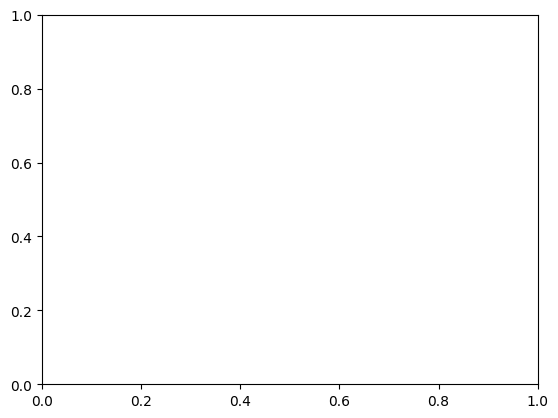

In [305]:
def TousSur1Graph(nb, alongations, Masses, Rayons, nomGraph, Youngs, AX, COLOR, loglog = True):
    minx =  99999999
    miny =  99999999
    maxx = -99999999
    maxy = -99999999
    for i in range(len(ToutLesSpheres)):  
        X = Pi2(Youngs, Masses, Rayons[i])
        Y = Pi1(alongations[i], Rayons[i])
        AX.errorbar( X, Y, xerr = 1.5, yerr = errMasse, 
                        marker = None,#MarkerStyle('o', fillstyle=markers[i])
                        ,ls = 'none', alpha = 0.5
                    )
        AX.scatter(X, Y, marker = MarkerStyle("o", fillstyle=markers[i]), s= 40, label = str(Rayons[i]), color = COLOR#, alpha = 0.5
                    )
        for c in range(len(X)):
            if X[c] <= minx:
                minx = X[c]
                miny = Y[c]
            if X[c] >= maxx:
                maxx = X[c]
                maxy = Y[c]
    pente = (maxy - miny)/(maxx-minx)
    AX.plot([minx, maxx], [miny, maxy], c = "k", alpha = 0.5, label = "pente = %.5f" %pente)
    # pas touche la mouche 
    plt.legend(loc='lower left')
    plt.title(nomGraph + " Y =" + "%.3f" %YoungsMpa[nb] + "MPa")
    plt.xlabel("$\Pi_2 = \\frac{Yr^2}{gm} = \\frac{Y}{gmr^{-2}}$")
    plt.ylabel("$\Pi_1 = \\frac{d_{alonge}}{r}$")
    if loglog:
        AX.set_xscale('log')
        AX.set_yscale('log')
    #plt.savefig("image.png")
COLORS = ["r", "g", "b"]
fig, AX = plt.subplots()
for i in range(len(ToutLesSpheres)):
    TousSur1Graph(i, ToutLesSpheres[i], Masses, Rayons, Noms[i], YoungPa[i], AX, COLORS[i])
plt.show()
plt.close()

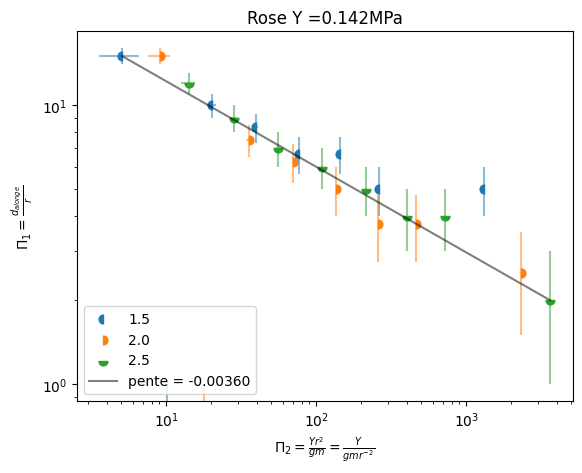

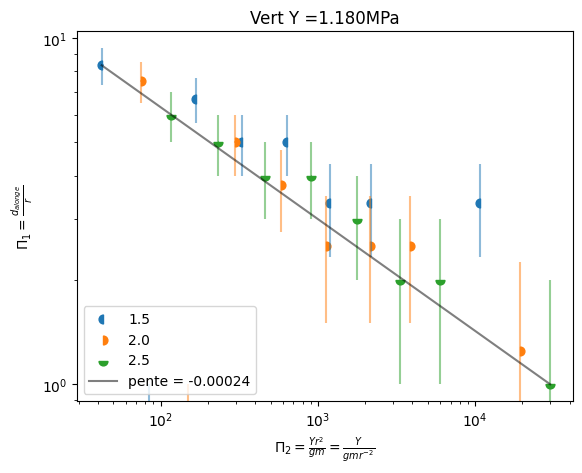

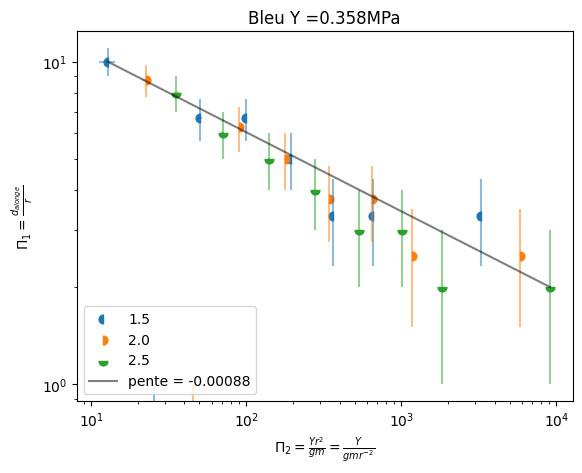

In [ ]:
for i in range(len(ToutLesSpheres)):
    Graph1FonctionDe2Tous(i, ToutLesSpheres[i], Masses, Rayons, Noms[i], YoungPa[i])

In [ ]:
# def Graph1FonctionDe2JusteYQuiChange(nb, Rayons, Youngs, masses, alongations, nomGraph, loglog = True):
#     fig, ax = plt.subplots()
#     minx =  99999999
#     miny =  99999999
#     maxx = -99999999
#     maxy = -99999999
#     for i in range(len(ToutLesSpheres)):  
#         X = Pi2(Youngs, Masses, Rayons[i])
#         Y = Pi1(alongations[i], Rayons[i])
#         ax.errorbar( X, Y, xerr = 1.5, yerr = errMasse, 
#                         marker = None,#MarkerStyle('o', fillstyle=markers[i])
#                         ls = 'none', alpha = 0.5
#                     )
#         ax.scatter(X, Y, marker = MarkerStyle("o", fillstyle=markers[i]), s= 40, label = str(Rayons[i])#, alpha = 0.5
#                     )
#         for c in range(len(X)):
#             if X[c] <= minx:
#                 minx = X[c]
#                 miny = Y[c]
#             if X[c] >= maxx:
#                 maxx = X[c]
#                 maxy = Y[c]
#     pente = (maxy - miny)/(maxx-minx)
#     ax.plot([minx, maxx], [miny, maxy], c = "k", alpha = 0.5, label = "pente = %.5f" %pente)
#     # pas touche la mouche 
#     plt.legend(loc='upper left')
#     plt.title(nomGraph + " Y =" + "%.3f" %YoungsMpa[nb] + "MPa")
#     plt.xlabel("$\Pi_2 = \\frac{Yr^2}{gm} = \\frac{Y}{gmr^{-2}}$")
#     plt.ylabel("$\Pi_1 = \\frac{d_{alonge}}{r}$")
#     if loglog:
#         ax.set_xscale('log')
#         ax.set_yscale('log')
#     #plt.savefig("image.png")
#     plt.show()
#     plt.close()
    
# for i in range(len(ToutLesSpheres)):
#     for j in range(len(ToutLesSpheres)):
#         Graph1FonctionDe2JusteYQuiChange()

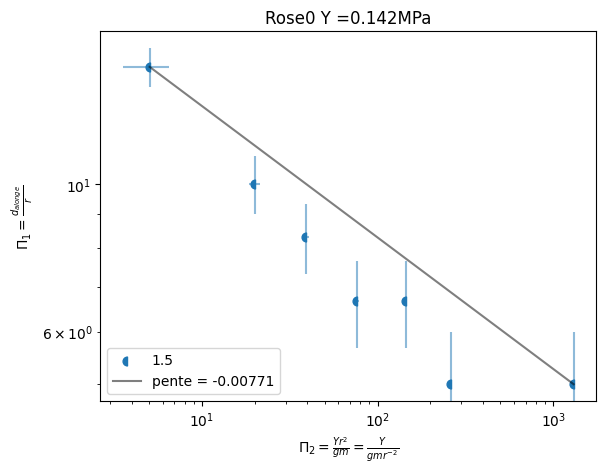

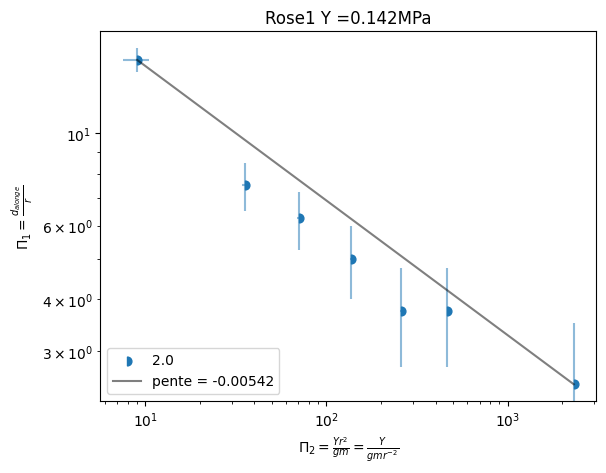

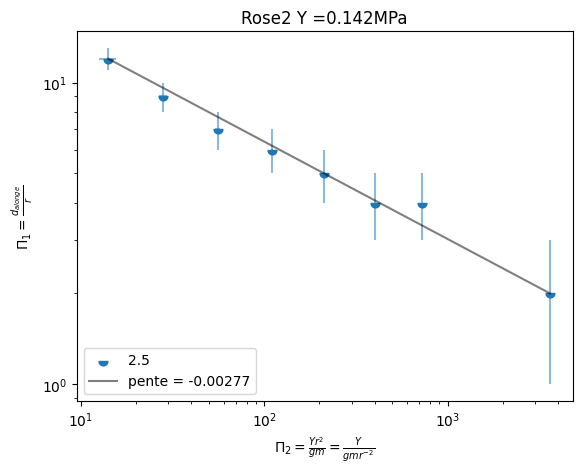

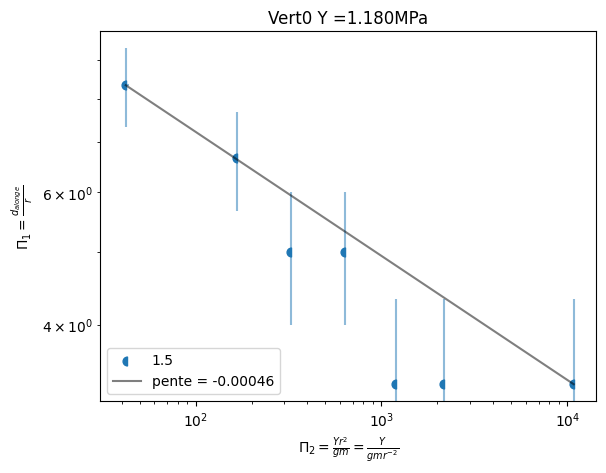

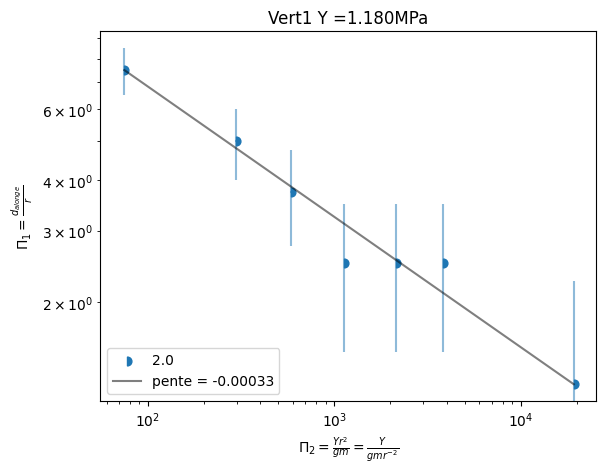

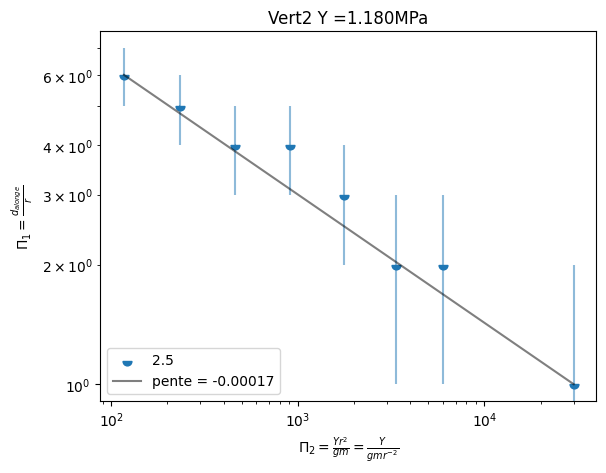

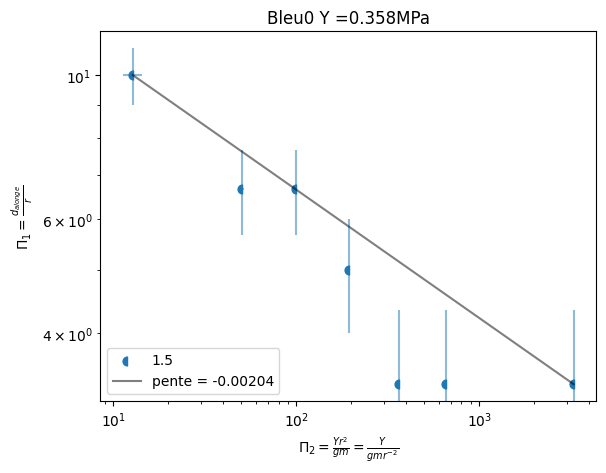

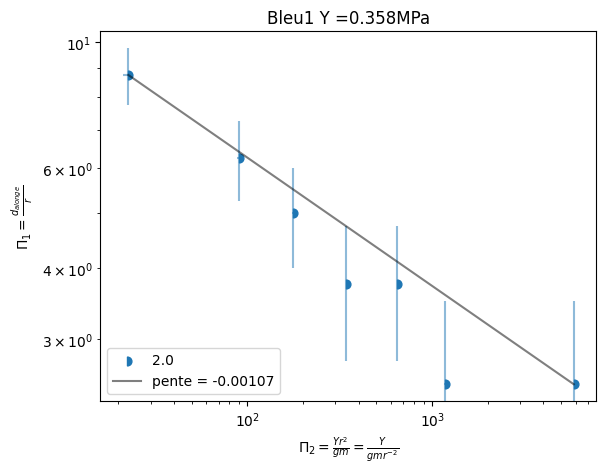

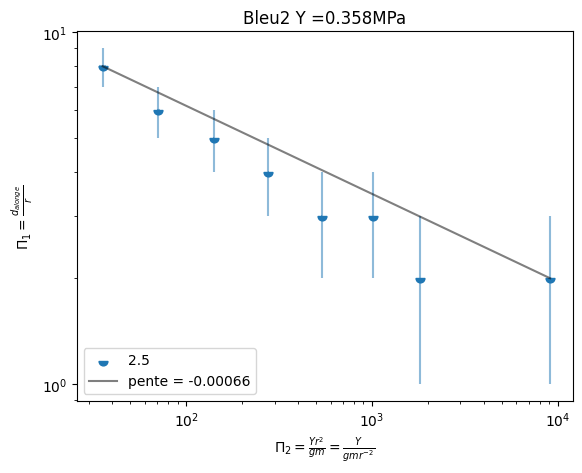

In [ ]:
for i in range(len(ToutLesSpheres)):
    for j in range(len(ToutLesSpheres)):
        Graph1FonctionDe2(i ,j, ToutLesSpheres[i][j], Masses, Rayons[j], Noms[i] + str(j), YoungPa[i])

In [ ]:
def GraphMasseDeformation(X : list, nomGraph : str, nb ,loglog = True):
    fig, ax = plt.subplots()
    for i in range(len(Rayons)):            
        ax.errorbar( X[i], Masse, xerr = 1.5, yerr = errMasse, 
                     marker = None,#MarkerStyle('o', fillstyle=markers[i])
                     ls = 'none', alpha = 0.5
                   )
        ax.scatter(X[i], Masse, marker = MarkerStyle("o", fillstyle=markers[i]), s= 40, label = str(Rayons[i])#, alpha = 0.5
                   )
    # pas touche la mouche 
    plt.legend(loc='upper left')
    plt.title(nomGraph + " Y =" + "%.3f" %YoungsMpa[nb] + "MPa")
    plt.xlabel("Deformation diametre en mm")
    plt.ylabel("Masse en gr")
    if loglog:
        ax.set_xscale('log')
        ax.set_yscale('log')
    #plt.savefig("image.png")
    plt.show()
    plt.close()
    

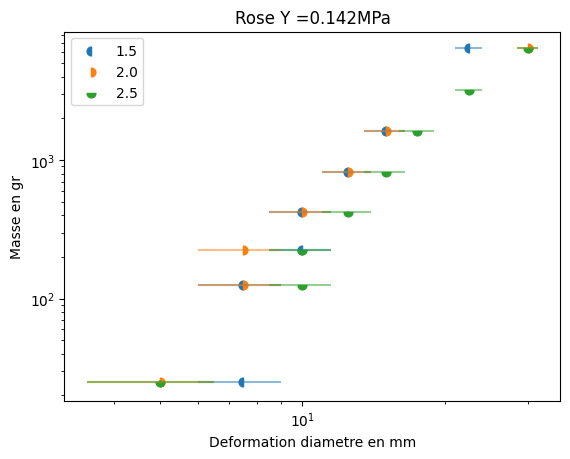

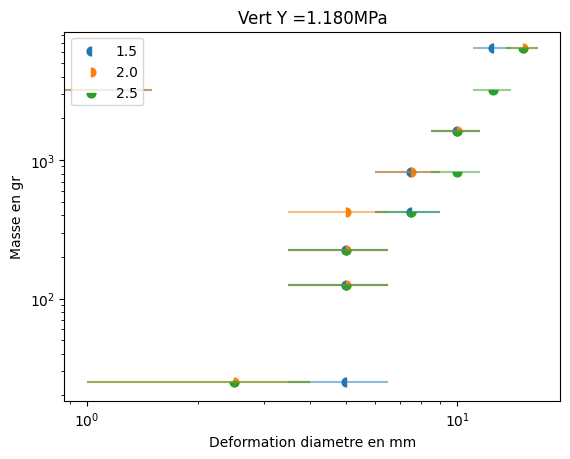

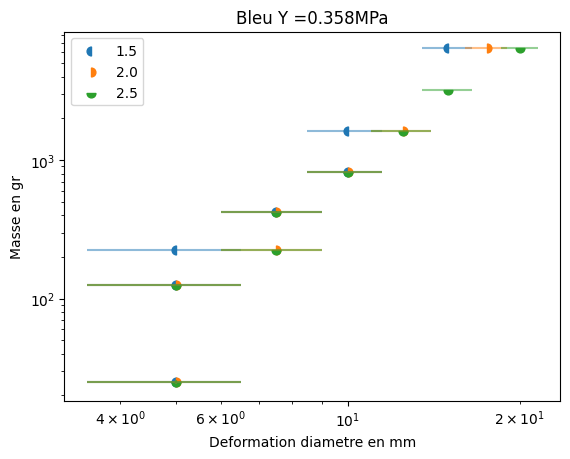

In [ ]:
for i in range(len(ToutLesSpheres)):
    GraphMasseDeformation(ToutLesSpheres[i], Noms[i], i)
# fig, ax = plt.subplots() 
# ax.errorbar(R[0], Masse, xerr = 1.5, yerr = errMasse, fmt = "o", label = Rayons[i], alpha = 0.7)
# ax.set_xscale('log')
# ax.set_yscale('log')